<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/abep10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch 제공하는 데이터셋

In [ ]:
import torch.utils.data
import torchvision.transforms as T

from torchvision.datasets import MNIST

## MNIST: 손글씨, 아라비아 숫자에 대한, 0 ~ 9
train_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), download=True)
test_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), train=False)


## Custom 데이터셋 만들기

In [4]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

- 데이터 확인

- pandas 0번째 row 데이터 호출
label    5.0
1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Name: 0, Length: 785, dtype: float64

- pandas 0번째 row 데이터 리스트로 변환
[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

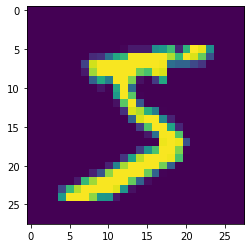

In [24]:
import os
import pandas as pd

train_data = pd.read_csv(train_path)
train_data = train_data.fillna(0)
first_data = train_data.loc[0]
print("- pandas 0번째 row 데이터 호출")
print(first_data)
first_data = first_data.tolist()
print("\n- pandas 0번째 row 데이터 리스트로 변환")
print(first_data)
# label 과 데이터로 분리
label = first_data[0]
data = first_data[1:]

import numpy as np
data = np.asarray(data) # 리스트 데이터를 numpy array 로 변환
print("\n-numpy array 변환")
data = data.reshape(28,28) # 이미지로 보기 위한 형태 변환

import matplotlib.pyplot as plt
print(f"\n label: {label}")
plt.imshow(data)

- 학습 및 평가에 활용할 수 있도록 데이터들을 데이터 셋으로 변경하기

In [25]:
import os
import numpy as np
import pandas as pd

train_data = pd.read_csv(train_path)
train_data = train_data.fillna(0)

dataset = []

for idx in range(len(train_data)):
  _data = train_data.loc[idx]  
  _data = _data.tolist()

  # label 과 데이터로 분리
  label = int(_data[0])
  data = _data[1:]

  dataset.append([label, data])

print("raw data length",len(train_data))
print("dataset length",len(dataset))


raw data length 1721
dataset length 1721


- 데이터셋 클래스에 이식하기: 위의 코드 단순히 이식

In [53]:
from torch.utils.data import Dataset

class CustomMNIST(Dataset):
  def __init__(self, data_path):
    raw_data = pd.read_csv(data_path).fillna(0)

    self.dataset = []

    for idx in range(len(raw_data)):
      _data = raw_data.loc[idx]  
      _data = _data.tolist()

      # label 과 데이터로 분리
      label = int(_data[0])
      data = _data[1:]

      self.dataset.append([data, label])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    data, label = self.dataset[idx]

    return data, label

In [61]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

train_dataset1 = CustomMNIST(train_path)
print(len(train_dataset1))
temp_data, temp_label = train_dataset1[0]
print(type(temp_data))
print(temp_label)
print(len(temp_data))

1721
<class 'list'>
5
784


In [62]:
# 위의 custom dataset은 문제가 있음.
# 무엇이 문제인지 확인.
from torch.utils.data import DataLoader

batch_size = 2
train_loader1 = DataLoader(train_dataset1, batch_size=batch_size)

for data in train_loader1:
  print(f"data type: {type(data)}") # data is list type
  print(f"data length: {len(data)}")
  
  print(type(data[0]))
  print(type(data[1]))

  print(f"data 0 length: {len(data[0])}")
  print(f"data 0: \n{data[0]}")

  print(f"data 1 size: {data[1].size()}")
  print(f"data 1: \n{data[1]}")

  break

data type: <class 'list'>
data length: 2
<class 'list'>
<class 'torch.Tensor'>
data 0 length: 784
data 0: 
[tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float64), tensor([0., 0.], dtype=torch.float

- 데이터셋 클래스에 이식하기: tensor로 반환하기

In [63]:
import torch
from torch.utils.data import Dataset

class CustomMNIST2(Dataset):
  def __init__(self, data_path):
    raw_data = pd.read_csv(data_path).fillna(0)

    self.dataset = []

    for idx in range(len(raw_data)):
      _data = raw_data.loc[idx]  
      _data = _data.tolist()

      # label 과 데이터로 분리
      label = int(_data[0])
      data = _data[1:]

      self.dataset.append([data, label])

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    data, label = self.dataset[idx]

    data = torch.tensor(data)

    return data, label

In [64]:
train_path = '/content/MNIST/mnist_train.csv'
test_path = '/content/MNIST/mnist_test.csv'

train_dataset2 = CustomMNIST2(train_path)
print(len(train_dataset2))
temp_data, temp_label = train_dataset2[0]
print(type(temp_data))
print(temp_label)
print(len(temp_data))

1721
<class 'torch.Tensor'>
5
784


In [65]:
# 위의 custom dataset은 문제가 있음.
# 무엇이 문제인지 확인.
from torch.utils.data import DataLoader

batch_size = 2
train_loader2 = DataLoader(train_dataset2, batch_size=batch_size)

for data in train_loader2:
  print(f"data type: {type(data)}") # data is list type
  print(f"data length: {len(data)}")
  
  print(type(data[0]))
  print(type(data[1]))

  print(f"data 0 length: {len(data[0])}")
  print(f"data 0: \n{data[0]}")

  print(f"data 1 size: {data[1].size()}")
  print(f"data 1: \n{data[1]}")

  break

data type: <class 'list'>
data length: 2
<class 'torch.Tensor'>
<class 'torch.Tensor'>
data 0 length: 2
data 0: 
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
data 1 size: torch.Size([2])
data 1: 
tensor([5, 0])
